<a href="https://colab.research.google.com/github/AlexRoman938/POSITIVES-COVID-19-PERU-BASIC-ANALYSIS/blob/main/Positives_Covid_Peru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/martinclark/peru-covid19-august-2020

Dataset until 19-08-20

In [32]:
#Imports
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
sns.set_style("darkgrid")

In [35]:
df_positives = pd.read_csv('/content/drive/MyDrive/DATASETS/COVID 19/positivos_covid.csv', encoding='latin-1')

What do I want?

POSITIVES CASES TOP 10 DEPARTAMENTO.

POSITIVES CASES TOP 10 PROVINCIA.

POSITIVES TOP 10 DISTRITO.

EDAD DISTRIBUTION.

SEXO DISTRIBUTION.

LINE PLOT OF TOP 10 DISTRITO ALONG THE TIME.

In [36]:
df_positives

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,7320cabdc1aaca6c59014cae76a134e6,AMAZONAS,BAGUA,BAGUA,PCR,47.0,MASCULINO,20200615
1,71ecb6bccb248b0bb2ac72ed51b5e979,AMAZONAS,BAGUA,BAGUA,PCR,15.0,FEMENINO,20200615
2,566af4276cbe9359abe93f9aa86396c3,AMAZONAS,BAGUA,BAGUA,PCR,88.0,MASCULINO,20200615
3,027561e9d126e7c283d79c02cede562d,AMAZONAS,BAGUA,BAGUA,PCR,73.0,MASCULINO,20200615
4,971f8e1295583756d81fe42f3318488c,AMAZONAS,BAGUA,BAGUA,PCR,4.0,FEMENINO,20200615
...,...,...,...,...,...,...,...,...
549316,7e83e75cf55fe3b88d0731e3c80c36bb,LORETO,DATEM DEL MARAÑON,ANDOAS,PR,8.0,MASCULINO,20200803
549317,f313ab6fb765fb1eef0c90dbd9dbd3bd,LORETO,DATEM DEL MARAÑON,ANDOAS,PR,9.0,MASCULINO,20200810
549318,4449181835a64ee1ec6b313a96e33f5b,LORETO,DATEM DEL MARAÑON,PASTAZA,PR,10.0,MASCULINO,20200807
549319,00d2b50461a52dc517095862663a5cee,LORETO,DATEM DEL MARAÑON,CAHUAPANAS,PR,0.0,MASCULINO,20200814


In [37]:
df_positives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549321 entries, 0 to 549320
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   UUID             549321 non-null  object 
 1   DEPARTAMENTO     549321 non-null  object 
 2   PROVINCIA        549321 non-null  object 
 3   DISTRITO         549321 non-null  object 
 4   METODODX         549321 non-null  object 
 5   EDAD             549247 non-null  float64
 6   SEXO             549321 non-null  object 
 7   FECHA_RESULTADO  549321 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 33.5+ MB


In [38]:
df_positives2 = df_positives.copy(deep = True)
#Drop the column METODODX

df_positives2.drop(['METODODX'], axis = 1, inplace = True)

In [39]:
#You will see the column METODODX was deleted.
df_positives2.head()

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,SEXO,FECHA_RESULTADO
0,7320cabdc1aaca6c59014cae76a134e6,AMAZONAS,BAGUA,BAGUA,47.0,MASCULINO,20200615
1,71ecb6bccb248b0bb2ac72ed51b5e979,AMAZONAS,BAGUA,BAGUA,15.0,FEMENINO,20200615
2,566af4276cbe9359abe93f9aa86396c3,AMAZONAS,BAGUA,BAGUA,88.0,MASCULINO,20200615
3,027561e9d126e7c283d79c02cede562d,AMAZONAS,BAGUA,BAGUA,73.0,MASCULINO,20200615
4,971f8e1295583756d81fe42f3318488c,AMAZONAS,BAGUA,BAGUA,4.0,FEMENINO,20200615


In [40]:
#First Convert to string the column "Fecha_Resultado". Next, convert to datetime
df_positives2['FECHA_RESULTADO'] = df_positives2['FECHA_RESULTADO'].astype('str')

df_positives2['FECHA_RESULTADO_DT'] = pd.to_datetime(df_positives2['FECHA_RESULTADO']
                                     , format = '%Y%m%d')

In [41]:
df_positives2

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,SEXO,FECHA_RESULTADO,FECHA_RESULTADO_DT
0,7320cabdc1aaca6c59014cae76a134e6,AMAZONAS,BAGUA,BAGUA,47.0,MASCULINO,20200615,2020-06-15
1,71ecb6bccb248b0bb2ac72ed51b5e979,AMAZONAS,BAGUA,BAGUA,15.0,FEMENINO,20200615,2020-06-15
2,566af4276cbe9359abe93f9aa86396c3,AMAZONAS,BAGUA,BAGUA,88.0,MASCULINO,20200615,2020-06-15
3,027561e9d126e7c283d79c02cede562d,AMAZONAS,BAGUA,BAGUA,73.0,MASCULINO,20200615,2020-06-15
4,971f8e1295583756d81fe42f3318488c,AMAZONAS,BAGUA,BAGUA,4.0,FEMENINO,20200615,2020-06-15
...,...,...,...,...,...,...,...,...
549316,7e83e75cf55fe3b88d0731e3c80c36bb,LORETO,DATEM DEL MARAÑON,ANDOAS,8.0,MASCULINO,20200803,2020-08-03
549317,f313ab6fb765fb1eef0c90dbd9dbd3bd,LORETO,DATEM DEL MARAÑON,ANDOAS,9.0,MASCULINO,20200810,2020-08-10
549318,4449181835a64ee1ec6b313a96e33f5b,LORETO,DATEM DEL MARAÑON,PASTAZA,10.0,MASCULINO,20200807,2020-08-07
549319,00d2b50461a52dc517095862663a5cee,LORETO,DATEM DEL MARAÑON,CAHUAPANAS,0.0,MASCULINO,20200814,2020-08-14


In [42]:
df_positives2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549321 entries, 0 to 549320
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   UUID                549321 non-null  object        
 1   DEPARTAMENTO        549321 non-null  object        
 2   PROVINCIA           549321 non-null  object        
 3   DISTRITO            549321 non-null  object        
 4   EDAD                549247 non-null  float64       
 5   SEXO                549321 non-null  object        
 6   FECHA_RESULTADO     549321 non-null  object        
 7   FECHA_RESULTADO_DT  549321 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 33.5+ MB


In [43]:
#split datetime into month
df_positives2['month'] = pd.DatetimeIndex(df_positives2['FECHA_RESULTADO_DT']).month

In [44]:
df_positives2

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,SEXO,FECHA_RESULTADO,FECHA_RESULTADO_DT,month
0,7320cabdc1aaca6c59014cae76a134e6,AMAZONAS,BAGUA,BAGUA,47.0,MASCULINO,20200615,2020-06-15,6
1,71ecb6bccb248b0bb2ac72ed51b5e979,AMAZONAS,BAGUA,BAGUA,15.0,FEMENINO,20200615,2020-06-15,6
2,566af4276cbe9359abe93f9aa86396c3,AMAZONAS,BAGUA,BAGUA,88.0,MASCULINO,20200615,2020-06-15,6
3,027561e9d126e7c283d79c02cede562d,AMAZONAS,BAGUA,BAGUA,73.0,MASCULINO,20200615,2020-06-15,6
4,971f8e1295583756d81fe42f3318488c,AMAZONAS,BAGUA,BAGUA,4.0,FEMENINO,20200615,2020-06-15,6
...,...,...,...,...,...,...,...,...,...
549316,7e83e75cf55fe3b88d0731e3c80c36bb,LORETO,DATEM DEL MARAÑON,ANDOAS,8.0,MASCULINO,20200803,2020-08-03,8
549317,f313ab6fb765fb1eef0c90dbd9dbd3bd,LORETO,DATEM DEL MARAÑON,ANDOAS,9.0,MASCULINO,20200810,2020-08-10,8
549318,4449181835a64ee1ec6b313a96e33f5b,LORETO,DATEM DEL MARAÑON,PASTAZA,10.0,MASCULINO,20200807,2020-08-07,8
549319,00d2b50461a52dc517095862663a5cee,LORETO,DATEM DEL MARAÑON,CAHUAPANAS,0.0,MASCULINO,20200814,2020-08-14,8


In [45]:
#We're going to see if there are nulls
df_positives2.isnull().sum()

UUID                   0
DEPARTAMENTO           0
PROVINCIA              0
DISTRITO               0
EDAD                  74
SEXO                   0
FECHA_RESULTADO        0
FECHA_RESULTADO_DT     0
month                  0
dtype: int64

In [46]:
#drop null
df_positives2.dropna(inplace=True)

In [47]:
#We're going to see if there are nulls
df_positives2.isnull().sum()

UUID                  0
DEPARTAMENTO          0
PROVINCIA             0
DISTRITO              0
EDAD                  0
SEXO                  0
FECHA_RESULTADO       0
FECHA_RESULTADO_DT    0
month                 0
dtype: int64

In [48]:
#drop some data
df_positives2.drop(df_positives2[df_positives2['PROVINCIA'] == 'EN INVESTIGACIÓN'].index, inplace = True)

#TOP 10 OF DEPARTAMENTS 

In [49]:
top10_departamentos = df_positives2['DEPARTAMENTO'].value_counts().head(10)
ntop10_departamentos = df_positives2['DEPARTAMENTO'].value_counts().head(10).index

In [50]:
ntop10_departamentos

Index(['LIMA', 'AREQUIPA', 'CALLAO', 'PIURA', 'LA LIBERTAD', 'LAMBAYEQUE',
       'LIMA REGION', 'ICA', 'ANCASH', 'LORETO'],
      dtype='object')

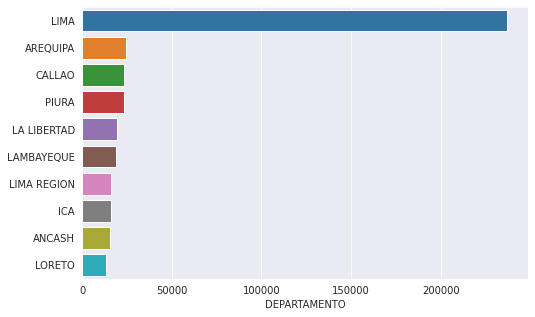

In [51]:
#TOP 10 OF DEPARTAMENTS OF POSITIVES CASES
plt.figure(figsize=(8,5))
sns.barplot(data= df_positives2, y = ntop10_departamentos, x = top10_departamentos )

#TOP 10 OF PROVINCIAS

In [52]:
top10_provincia = df_positives2['PROVINCIA'].value_counts().head(10)
ntop10_provincia = df_positives2['PROVINCIA'].value_counts().head(10).index

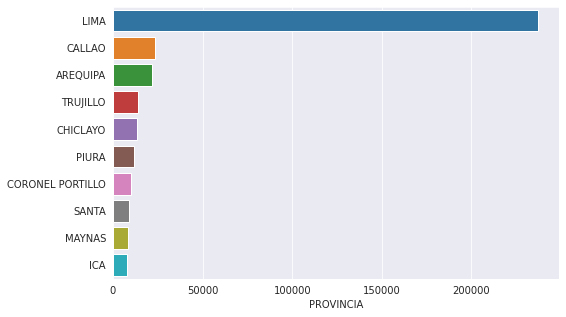

In [53]:
#TOP 10 OF PROVINCIAS OF POSITIVES CASES
plt.figure(figsize=(8,5))
sns.barplot(data= df_positives2, y = ntop10_provincia, x = top10_provincia )

#TOP 10 OF DISTRITO

In [54]:
top10_distrito = df_positives2['DISTRITO'].value_counts().head(10)
ntop10_distrito = df_positives2['DISTRITO'].value_counts().head(10).index

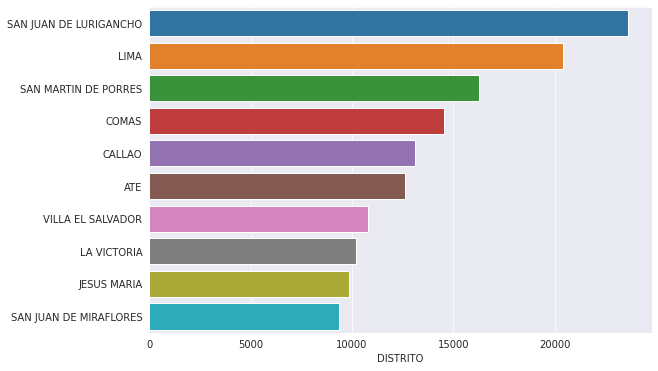

In [55]:
plt.figure(figsize=(9,6))
sns.barplot(data= df_positives2, y = ntop10_distrito, x = top10_distrito )

#AGE DISTRIBUTION

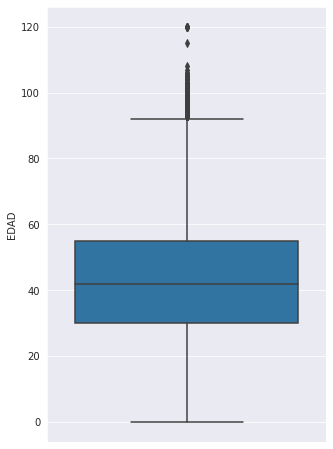

In [56]:
#View data distribution
plt.figure(figsize=(5,8))
sns.boxplot(data = df_positives2 , y = 'EDAD')

#SEXO

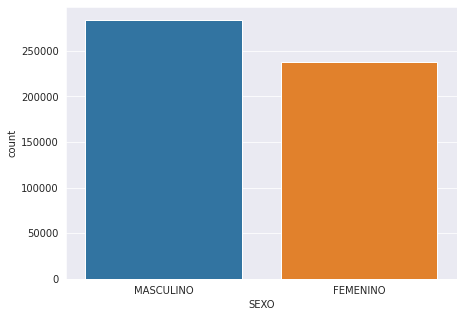

In [57]:
plt.figure(figsize=(7,5))
sns.countplot(data = df_positives2, x= 'SEXO')

#EVALUACION FOR THE PERIOD

In [58]:
#New variable
df_positives3 = df_positives2.copy()

In [59]:
df_positives3['month'] = df_positives3['month'].astype('str') # Int to Str

df_positives3['month_text'] = df_positives3['month'].map({ '3': 'March', '4': 'April', '5':'May', '6':'June', 
                                   '7': 'July', '8': 'August'})

In [60]:
df_positives3

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,SEXO,FECHA_RESULTADO,FECHA_RESULTADO_DT,month,month_text
0,7320cabdc1aaca6c59014cae76a134e6,AMAZONAS,BAGUA,BAGUA,47.0,MASCULINO,20200615,2020-06-15,6,June
1,71ecb6bccb248b0bb2ac72ed51b5e979,AMAZONAS,BAGUA,BAGUA,15.0,FEMENINO,20200615,2020-06-15,6,June
2,566af4276cbe9359abe93f9aa86396c3,AMAZONAS,BAGUA,BAGUA,88.0,MASCULINO,20200615,2020-06-15,6,June
3,027561e9d126e7c283d79c02cede562d,AMAZONAS,BAGUA,BAGUA,73.0,MASCULINO,20200615,2020-06-15,6,June
4,971f8e1295583756d81fe42f3318488c,AMAZONAS,BAGUA,BAGUA,4.0,FEMENINO,20200615,2020-06-15,6,June
...,...,...,...,...,...,...,...,...,...,...
549316,7e83e75cf55fe3b88d0731e3c80c36bb,LORETO,DATEM DEL MARAÑON,ANDOAS,8.0,MASCULINO,20200803,2020-08-03,8,August
549317,f313ab6fb765fb1eef0c90dbd9dbd3bd,LORETO,DATEM DEL MARAÑON,ANDOAS,9.0,MASCULINO,20200810,2020-08-10,8,August
549318,4449181835a64ee1ec6b313a96e33f5b,LORETO,DATEM DEL MARAÑON,PASTAZA,10.0,MASCULINO,20200807,2020-08-07,8,August
549319,00d2b50461a52dc517095862663a5cee,LORETO,DATEM DEL MARAÑON,CAHUAPANAS,0.0,MASCULINO,20200814,2020-08-14,8,August


In [61]:
serie_distrito = df_positives3[df_positives3['DISTRITO'].isin(ntop10_distrito)]
serie_distrito

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,EDAD,SEXO,FECHA_RESULTADO,FECHA_RESULTADO_DT,month,month_text
335,d13446e4c6ded923ada4df1c24560c7a,LIMA,LIMA,SAN JUAN DE MIRAFLORES,57.0,MASCULINO,20200724,2020-07-24,7,July
337,3e86e9e72d03e07c8a358a34c80e0a89,LIMA,LIMA,SAN JUAN DE LURIGANCHO,58.0,MASCULINO,20200724,2020-07-24,7,July
338,ce710649fc86901f5baf11a729ac360a,LIMA,LIMA,LA VICTORIA,58.0,MASCULINO,20200726,2020-07-26,7,July
341,f471f3b9040fecc996c0b27d660d70f8,LIMA,LIMA,SAN JUAN DE LURIGANCHO,59.0,MASCULINO,20200722,2020-07-22,7,July
342,d64a80d367777b525b9eff6d13582a4d,LIMA,LIMA,JESUS MARIA,59.0,MASCULINO,20200728,2020-07-28,7,July
...,...,...,...,...,...,...,...,...,...,...
546109,55f229b06d48b6032c011cd2e62d741c,LIMA,LIMA,SAN JUAN DE LURIGANCHO,7.0,MASCULINO,20200805,2020-08-05,8,August
546110,2b02407f81fd24c4f6e4362d1ddd8a48,LIMA,LIMA,SAN JUAN DE MIRAFLORES,0.0,MASCULINO,20200801,2020-08-01,8,August
546111,fc2d3f367dde7940c09f77400861528e,LIMA,LIMA,VILLA EL SALVADOR,0.0,MASCULINO,20200802,2020-08-02,8,August
546117,4f2f05e2086d6f82228363e0f2c7a254,LIMA,LIMA,SAN JUAN DE LURIGANCHO,3.0,MASCULINO,20200802,2020-08-02,8,August


In [62]:
groupby_serie_distrito = serie_distrito.groupby(['month', 'month_text' ,'DISTRITO'], as_index= False).agg({'UUID' : 'count'}) 
groupby_serie_distrito

,month,month_text,DISTRITO,UUID
0,3,March,ATE,32
1,3,March,CALLAO,13
2,3,March,COMAS,31
3,3,March,JESUS MARIA,61
4,3,March,LA VICTORIA,28
5,3,March,LIMA,94
6,3,March,SAN JUAN DE LURIGANCHO,40
7,3,March,SAN JUAN DE MIRAFLORES,38
8,3,March,SAN MARTIN DE PORRES,46
9,3,March,VILLA EL SALVADOR,21


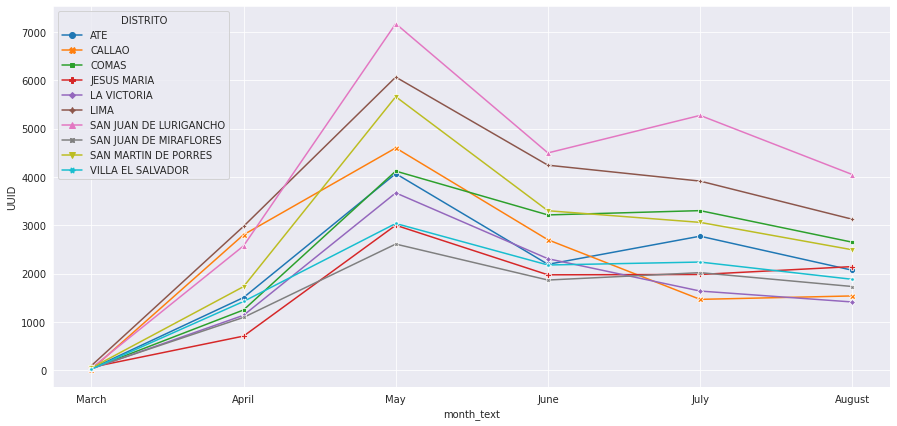

In [63]:
#ANALYSIS ALONG THE TIME OF THE TOP DISTRITO
plt.figure(figsize = (15,7))
sns.lineplot(x="month_text", y="UUID", hue="DISTRITO", data= groupby_serie_distrito, style= 'DISTRITO' 
             , markers= True, dashes=False)